In [1]:
import numpy as np

In [2]:
sample_size = 10
pop_mean = 3
pop_range = 4
sample = np.random.uniform(pop_mean - pop_range, 
                           pop_mean + pop_range,
                          size=sample_size)

In [3]:
stderr = np.std(sample, ddof=1) / np.sqrt(sample_size)
r = 1.96 * stderr
sample_mean = np.mean(sample)
confint = (sample_mean - r, sample_mean + r)

In [4]:
confint

(1.3985781200763308, 4.5398846071565275)

As we see true population mean lies within our confidence interval. How often our true population mean does not lie in the confidence interval?

In [13]:
iterations = 10000
counter = 0

for i in range(iterations):
    sample = np.random.uniform(pop_mean - pop_range, 
                           pop_mean + pop_range,
                          size=sample_size)
    stderr = np.std(sample, ddof=1) / np.sqrt(sample_size)
    r = 1.96 * stderr
    sample_mean = np.mean(sample)
    confint = (sample_mean - r, sample_mean + r)
    if confint[0] < pop_mean < confint[1]:
        counter += 1

print(counter / iterations * 100)

91.84


As we see the number is not quite 95%. Why is that? Apparently sample size is too low for the CLT to start working and 1.96 is coming from the Standard Normal Distribution.

### Confidence intervals: beyond 1.96

In [18]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [17]:
stats.norm.interval(.95)

(-1.959963984540054, 1.959963984540054)

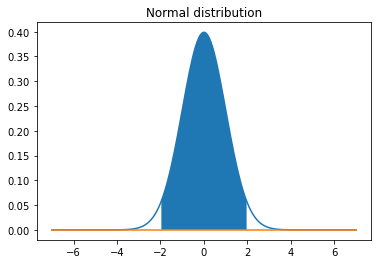

In [23]:
conf_level = .95
left, right = stats.norm.interval(conf_level)
x = np.linspace(-7, 7, 200)
x_int = np.linspace(left, right, 200)

plt.plot(x, stats.norm.pdf(x))
plt.fill_between(x_int, stats.norm.pdf(x_int))
plt.plot(x, np.zeros_like(x))
plt.title('Normal distribution')
plt.show()

If the sample size is too small we might be better to consider T distribution

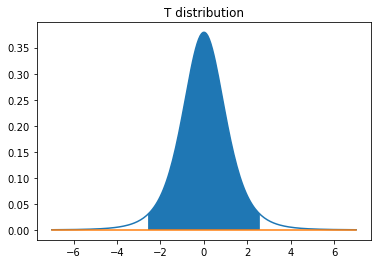

In [26]:
conf_level = .95
df = 5  # sample size - 1
left, right = stats.t.interval(conf_level, df=df)
x = np.linspace(-7, 7, 200)
x_int = np.linspace(left, right, 200)

plt.plot(x, stats.t.pdf(x, df=df))
plt.fill_between(x_int, stats.t.pdf(x_int, df=df))
plt.plot(x, np.zeros_like(x))
plt.title('T distribution')
plt.show()

Let's see how it works on some simulation

In [27]:
sample_size = 10
pop_mean = 3
pop_range = 4
df = sample_size - 1
_, right = stats.t.interval(conf_level, df=df)

In [28]:
iterations = 10000
counter = 0

for i in range(iterations):
    sample = np.random.uniform(pop_mean - pop_range, 
                           pop_mean + pop_range,
                          size=sample_size)
    stderr = np.std(sample, ddof=1) / np.sqrt(sample_size)
    r = right * stderr
    sample_mean = np.mean(sample)
    confint = (sample_mean - r, sample_mean + r)
    if confint[0] < pop_mean < confint[1]:
        counter += 1

print(counter / iterations * 100)

94.54


The count is much closer to the 95% using the same sample size as in the example above with the Normal distribution.